In [1]:
%load_ext autoreload
%autoreload 2

import loans
from loans import Applicant
from loans import Loan
from loans import Bank
import search
from search import Node
from search import BST
import time
import pandas

/tmp/ipykernel_654104/4171548680.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
fhb = loans.Bank("First Home Bank")

In [3]:
#Q1
amt = 0
size = 0
for loan in fhb.loansList:
    if loan.interest_rate != -1:
        size += 1
        amt += loan.interest_rate
    
amt/size


2.962962962962963

In [4]:
#Q2
total = 0
for _ in fhb.loansList:
    total += len(_.applicants)
    
total/len(fhb)

1.5777777777777777

In [5]:
#Q3
ages = {}
for _ in fhb.loansList:
    for a in _.applicants:
        age = str(a.age)
        if age in ages.keys():
            ages[age] += 1
        else:
            if a.age != 9999:
                ages[age] = 1
ages

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
t = search.BST()
for _ in fhb.loansList:
    t.add(_.interest_rate, _)

In [7]:
#Q4
len(t[-1])

18

In [8]:
#Q5
def height(root):
    if root is None:
        return 0
    
    left_height = height(root.left)
    right_height = height(root.right)
    
    if left_height == 0 and right_height == 0:
        return 1
    
    return max(left_height, right_height) + 1

height(t.root) - 1

8

In [9]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
tree = search.BST()

<Axes: xlabel='Loans', ylabel='Milliseconds'>

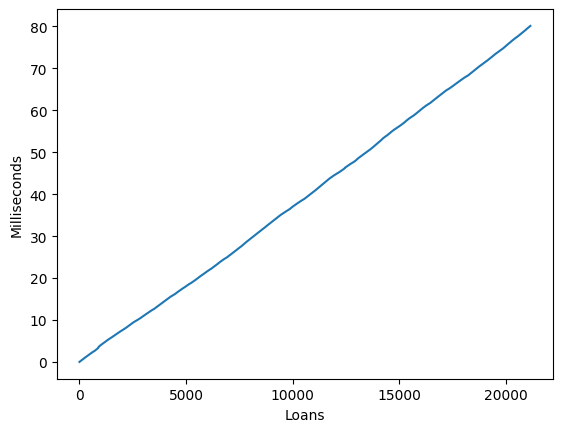

In [10]:
#Q6
def getAddTime(loan):
    t0 = time.time()
    tree.add(loan.interest_rate, loan)
    t1 = time.time()
    return (t1 - t0) * 1e3

times_df = pandas.DataFrame(columns=["AddTime"], dtype=float)
milliseconds = 0
limit = 15000
for count, loan in enumerate(uwcu.loansList):
    milliseconds += getAddTime(loan)
    if milliseconds > limit:
        break
    times_df.at[count + 1, "AddTime"] = milliseconds

times_df.plot.line(xlabel="Loans", ylabel="Milliseconds", legend=None)

<Axes: ylabel='Milliseconds'>

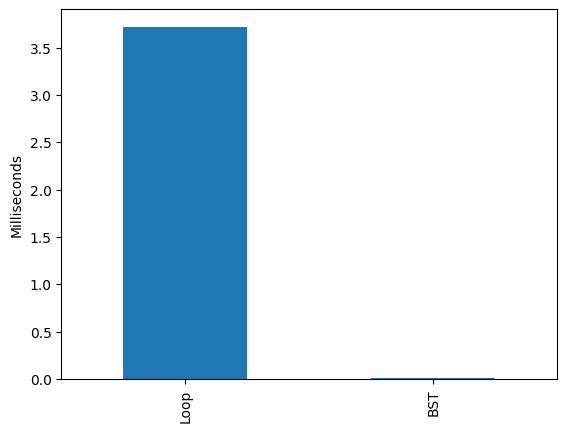

In [11]:
#Q7
def getLoopTime(loans):
    t0 = time.time()
    count = 0
    for loan in loans:
        if loan.interest_rate == -1:
            count += 1
    t1 = time.time()
    return (t1-t0)*1e3

def getBSTTime():
    t0 = time.time()
    len(tree[-1])
    t1 = time.time()
    return (t1-t0)*1e3

times_df = pandas.DataFrame(dtype=float)
times_df.at["Loop", "time"] = getLoopTime(uwcu.loansList)
times_df.at["BST", "time"] = getBSTTime()
times_df["time"].plot.bar(ylabel="Milliseconds")

<Axes: xlabel='Number of Race Identities', ylabel='Number of Applicants'>

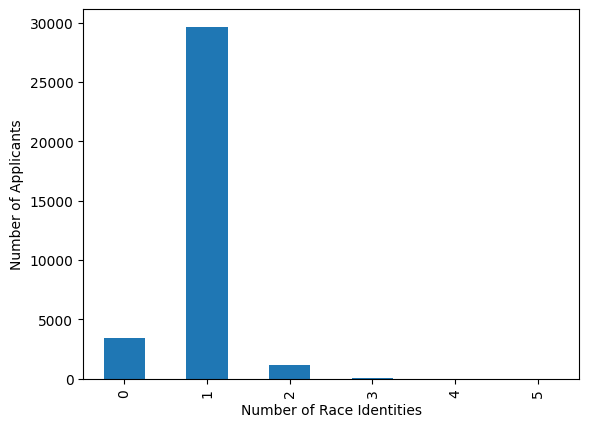

In [12]:
#Q8
numRace = {}
for loan in uwcu.loansList:
    for applicant in loan.applicants:
        num = len(applicant.race)
        if num in numRace.keys():
            numRace[num] += 1
        else:
            numRace[num] = 1
            
raceKeys = list(numRace.keys())
raceKeys.sort()
sorted_dict = {i: numRace[i] for i in raceKeys}

series = pandas.Series(sorted_dict)
series.plot.bar(xlabel = "Number of Race Identities", ylabel = "Number of Applicants")

In [13]:
#Q9
def numLeafNodes(root):
    count = 0
    if root.left == None and root.right == None:
        return 1
    if root.left != None:
        count += numLeafNodes(root.left)
    if root.right != None:
        count += numLeafNodes(root.right)
    return count
numLeafNodes(tree.root)

9

In [14]:
#Q10
def topNKeys(node, n):
    topList = []
    if node.right != None:
        topList.extend(topNKeys(node.right, n))
    if (len(topList) < n):
        topList.append(node.key)
    if (len(topList) < n):
        if node.left != None:
            topList.extend(topNKeys(node.left, n))
    return topList

topNKeys(tree.root, 4)[3]

5.0